<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_python/da05_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tips 데이터셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Box plot

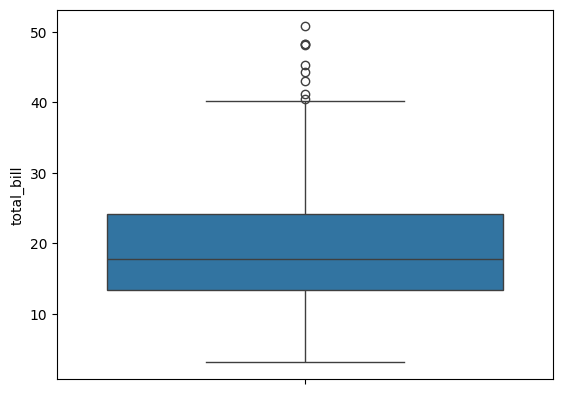

In [7]:
# total_bill의 box plot
sns.boxplot(data=tips, y='total_bill')
plt.show()

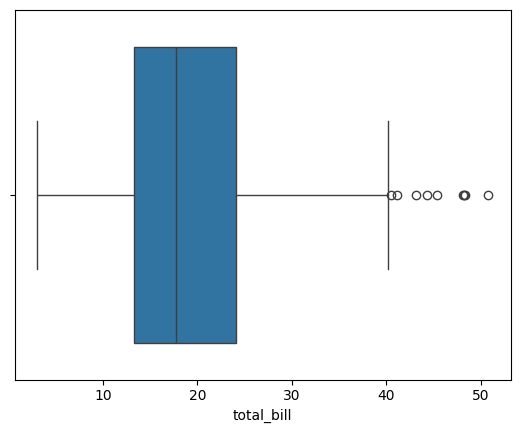

In [8]:
sns.boxplot(data=tips, x='total_bill')
plt.show()

## 성별 팁의 box plot

In [11]:
tips[tips.sex == 'Male'].tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [15]:
tips[tips.sex == 'Female'].tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


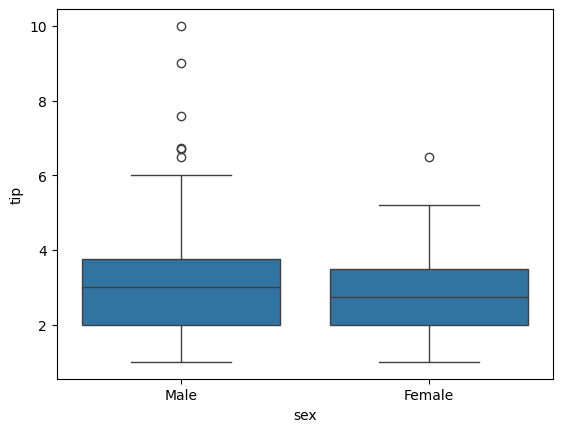

In [16]:
sns.boxplot(data=tips, x='sex', y='tip')
plt.show()

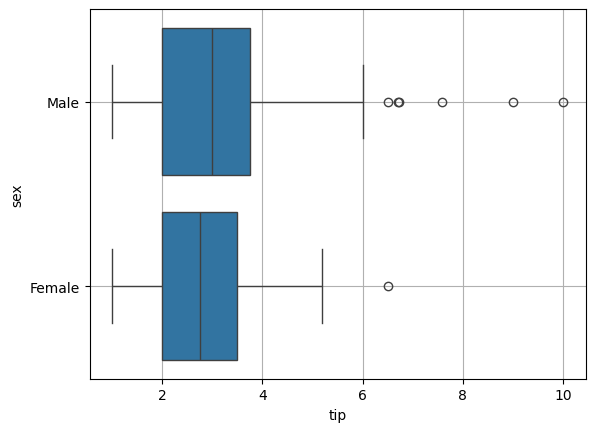

In [18]:
sns.boxplot(data=tips, x='tip', y='sex')
plt.grid()
plt.show()